In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import linear_model

sns.set()

Assume $y = 0.5 \cdot x + 1 + \epsilon$, where $\epsilon \sim N(0, 0.5^2)$. We generate $n$ training examples by sampling $x$ uniformly from $[1, 6)$.

In [11]:
n = 200
x = 5 * np.random.rand(n, 1) + 1

a = 0.5
b = 1
sigma = 0.5
y = a * x + b + sigma * np.random.randn(n, 1)

We sample the regularization parameter $\lambda$ from $\left[10^{-4}, 10^3\right]$. For each $\lambda$, we fit a ridge regression model.

In [12]:
m = 200
lambdas = np.logspace(-4, 3, m)

w = np.zeros((2, m))
for i in range(m):
    alpha = lambdas[i] * n
    rr = linear_model.Ridge(alpha=alpha, fit_intercept=True)
    rr.fit(x, y)
    w[0, i] = rr.intercept_[0]
    w[1, i] = rr.coef_[0][0]

We plot the model coefficients, including the bias $w_0$, as $\lambda$ increases.

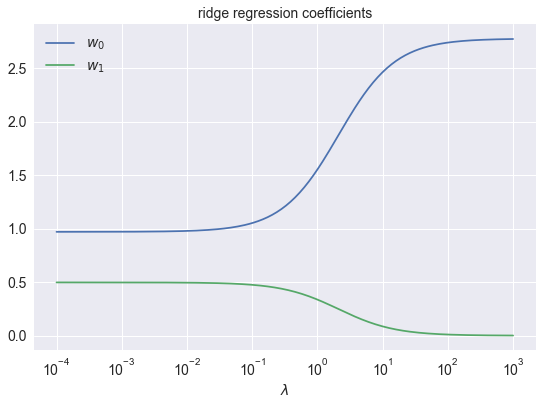

In [13]:
plt.figure(figsize=(9, 6))
plt.tick_params(labelsize=14)
plt.semilogx(lambdas, w[0], lambdas, w[1])
plt.legend([r'$w_0$', r'$w_1$'], loc='upper left', fontsize=14)
plt.xlabel(r'$\lambda$', fontsize=14)
plt.title('ridge regression coefficients', fontsize=14)
plt.show()

Below we plot the training set along with the ridge regression model fitted with $\lambda = 10^{-3}$.

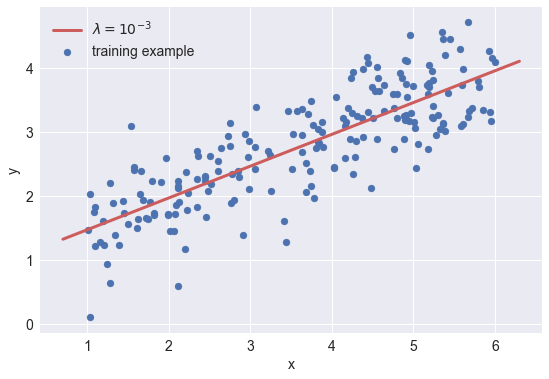

In [14]:
rr = linear_model.Ridge(alpha=1e-3 * n, fit_intercept=True)
rr.fit(x, y)
w0 = rr.intercept_[0]
w1 = rr.coef_[0][0]

x1 = np.array([0.7, 6.3])
y1 = w1 * x1 + w0

plt.figure(figsize=(9, 6))
plt.tick_params(labelsize=14)
plt.scatter(x, y)
plt.plot(x1, y1, 'indianred', linewidth=3)
plt.legend([r'$\lambda=10^{-3}$', 'training example'], loc='upper left', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()